## Implementing Data Biasness Rule from Responsible AI

In [11]:
import os
import json5
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_dir = './data/reduced_mixed_3/reduced_mixed_3'

all_files = os.listdir(data_dir)
print(f"All files: {all_files}")



# Verify the content and structure of the files
data_entries = []
file_count = 0

for file_name in all_files:
    if file_name.startswith('sdgIndicatorData__') and file_name.endswith('.json5'):
        file_path = os.path.join(data_dir, file_name)
        file_count += 1
        with open(file_path, 'r') as f:
            try:
                data = json5.load(f)
                print(f"Loaded data from {file_name}: {data.keys()}")  # Print the keys to verify structure
                if 'data' in data:
                    data_entries.extend(data['data'])
            except Exception as e:
                print(f"Error loading {file_path}: {e}")

print(f"Total files processed: {file_count}")
print(f"Total data entries loaded: {len(data_entries)}")
if len(data_entries) > 0:
    print(json5.dumps(data_entries[0], indent=2))
else:
    print("No data entries loaded.")



All files: ['indicatorDataMeta.json5', 'indicatorPivotDataMeta.json5', 'sdgIndicatorData__1.1.1.json5', 'sdgIndicatorData__1.2.1.json5', 'sdgIndicatorData__1.2.2.json5', 'sdgIndicatorData__1.3.1.json5', 'sdgIndicatorData__1.4.1.json5', 'sdgIndicatorData__1.4.2.json5', 'sdgIndicatorData__1.5.1.json5', 'sdgIndicatorData__1.5.2.json5', 'sdgIndicatorData__1.5.3.json5', 'sdgIndicatorData__1.5.4.json5', 'sdgIndicatorData__1.a.1.json5', 'sdgIndicatorData__1.a.2.json5', 'sdgIndicatorData__1.b.1.json5', 'sdgIndicatorData__10.1.1.json5', 'sdgIndicatorData__10.2.1.json5', 'sdgIndicatorData__10.3.1.json5', 'sdgIndicatorData__10.4.1.json5', 'sdgIndicatorData__10.4.2.json5', 'sdgIndicatorData__10.5.1.json5', 'sdgIndicatorData__10.6.1.json5', 'sdgIndicatorData__10.7.1.json5', 'sdgIndicatorData__10.7.2.json5', 'sdgIndicatorData__10.7.3.json5', 'sdgIndicatorData__10.7.4.json5', 'sdgIndicatorData__10.a.1.json5', 'sdgIndicatorData__10.b.1.json5', 'sdgIndicatorData__10.c.1.json5', 'sdgIndicatorData__11.1.

In [13]:
# Convert to DataFrame
df = pd.DataFrame(data_entries)

print(df)


# Convert 'value' column to numeric
df['value'] = pd.to_numeric(df['value'], errors='coerce')

# Display the DataFrame
print(df.head())


    goal target indicator         series  \
0    [1]  [1.1]   [1.1.1]    SI_POV_DAY1   
1    [1]  [1.1]   [1.1.1]    SI_POV_EMP1   
2    [1]  [1.1]   [1.1.1]    SI_POV_EMP1   
3    [1]  [1.2]   [1.2.1]    SI_POV_NAHC   
4    [1]  [1.2]   [1.2.1]    SI_POV_NAHC   
..   ...    ...       ...            ...   
691  [9]  [9.b]   [9.b.1]    NV_IND_TECH   
692  [9]  [9.b]   [9.b.1]    NV_IND_TECH   
693  [9]  [9.c]   [9.c.1]  IT_MOB_2GNTWK   
694  [9]  [9.c]   [9.c.1]  IT_MOB_3GNTWK   
695  [9]  [9.c]   [9.c.1]  IT_MOB_4GNTWK   

                                     seriesDescription seriesCount  \
0    Proportion of population below international p...        8748   
1    Employed population below international povert...       32396   
2    Employed population below international povert...       32396   
3    Proportion of population living below the nati...         912   
4    Proportion of population living below the nati...         912   
..                                                 

In [14]:

# Extract the 'Sex' value from 'dimensions'
df['dim_sex'] = df['dimensions'].apply(lambda x: x.get('Sex') if isinstance(x, dict) else None)

# Extract the 'Age' value from 'dimensions'
df['dim_age'] = df['dimensions'].apply(lambda x: x.get('Age') if isinstance(x, dict) else None)

# Extract the 'Reporting Type' value from 'dimensions'
df['dim_Reporting Type']=  df['dimensions'].apply(lambda x: x.get('Reporting Type') if isinstance(x, dict) else None)

# Extract the 'Location' value from 'dimensions'
df['dim_location']=  df['dimensions'].apply(lambda x: x.get('Location') if isinstance(x, dict) else None)



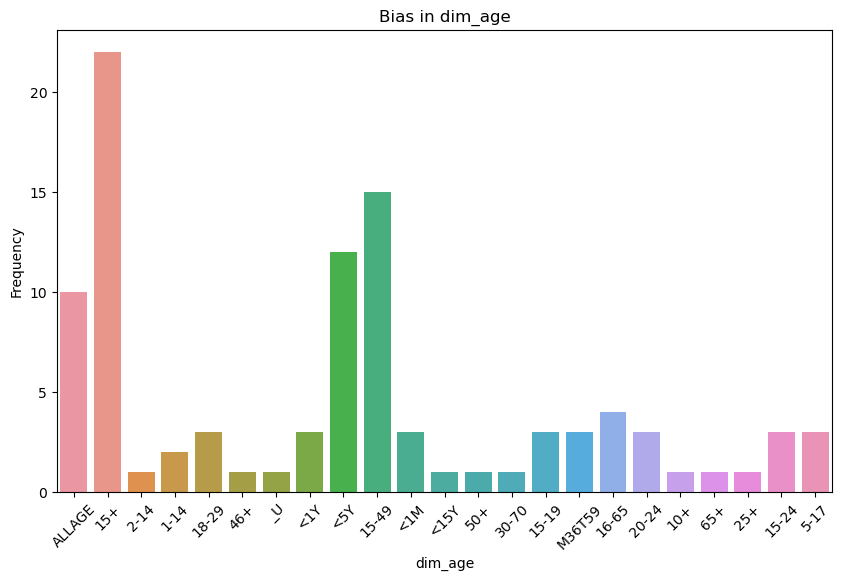

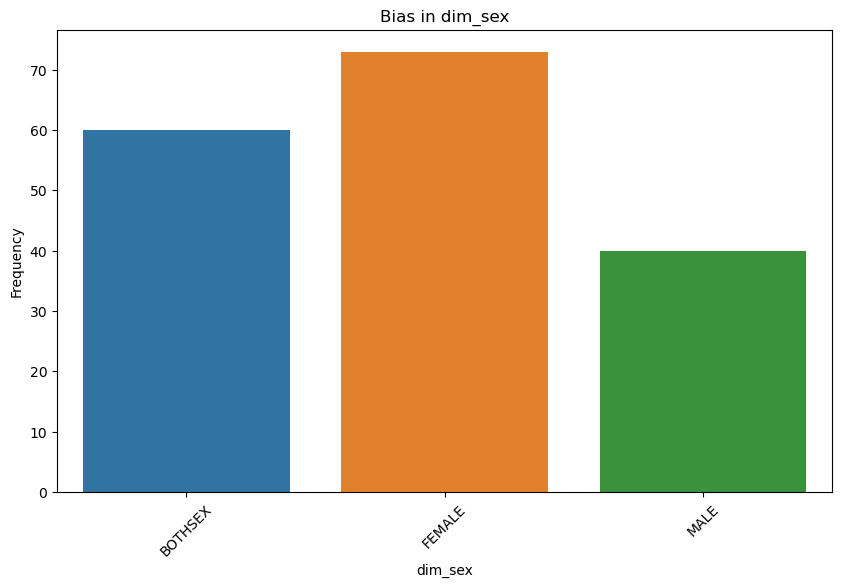

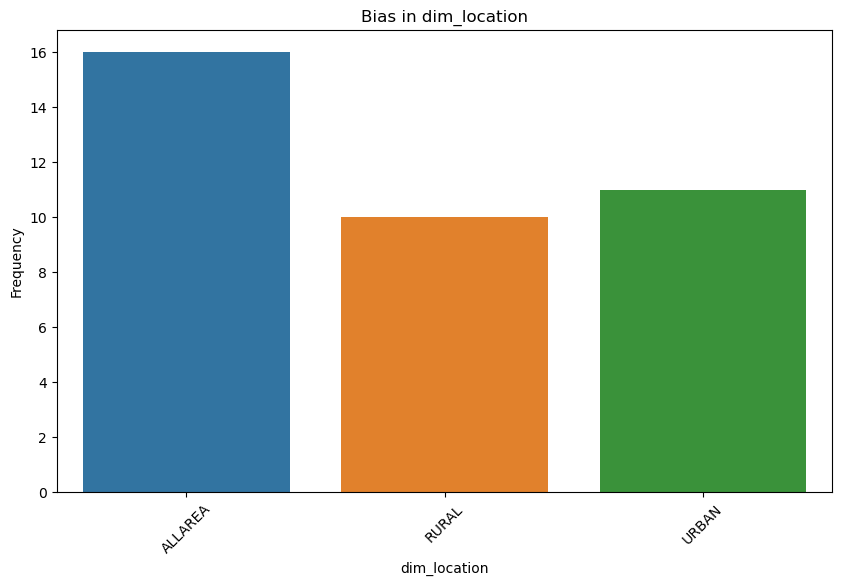

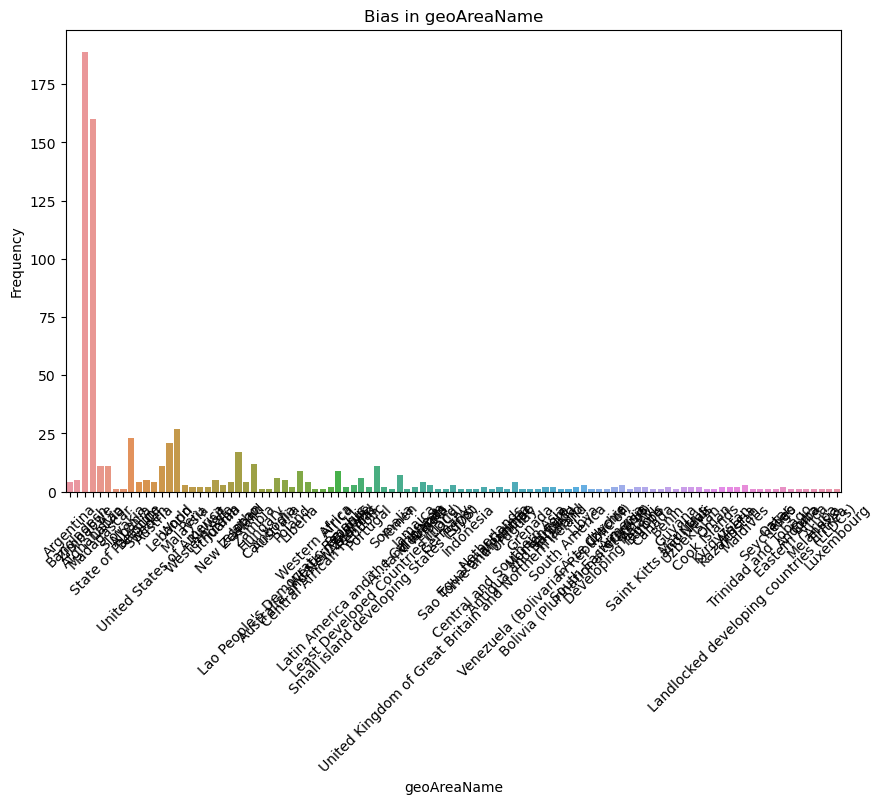

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns


#create bar graph
def plot_bias(df, column, title):
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=df)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

# fields name
fields = [
    'dim_age', 'dim_sex', 'dim_location','geoAreaName']


for field in fields:
    plot_bias(df, field, f'Bias in {field}')

### Bias Identification

- Age: Potential bias towards the 'ALLAGE' category, indicating data contains more data for this category.
- Sex: Potential bias towards 'BOTHSEX',  indicating data contains more data sample of this category.
- Location: Potential bias towards 'ALLAREA'.
- GeoAreaName: Potential geographic bias if certain areas are overrepresented like 'Zimbabwe' and 'Afghanistan'.



## Implementing Data Transparency Rules from Responsible AI

To implement data transparency, we need to focus on the following aspects:

- Clear Documentation: Providing clear documentation for each data field, its source, and its relevance.
- Data Provenance: Including data about the origin and source of the data, from where the data is gathered /get.
- Bias Identification: Identifying and documenting any biases present in the dataset.



Let's provide clear documentation for each field:

- goal: Represents the Sustainable Development Goal (SDG) that the data entry is related to.
- target: Specific targets under each goal.
- indicator: Indicators used to measure progress towards the targets.
- series: Unique identifier for the data series.
- seriesDescription: Detailed description of what the series measures.
- seriesCount: Number of entries in the series.
- geoAreaCode: Numeric code representing the geographical area.
- geoAreaName: Name of the geographical area.
- timePeriodStart: The start year of the time period the data covers.
- value: The measured value of the indicator.
- valueType: Type of the value (e.g., Float, Integer).
- time_detail: Additional details about the time period.
- timeCoverage: Description of the time coverage.
- upperBound: Upper bound of the measured value (if any).
- lowerBound: Lower bound of the measured value (if any).
- basePeriod: Reference period for the data.
- source: Origin or provider of the data.
- geoInfoUrl: URL with more information about the geographical data.
- footnotes: Additional notes or explanations about the data entry.
- attributes: Additional attributes related to the data, such as units and nature.
- dimensions: Breakdown of the data by specific dimensions like age, location, sex, and reporting type.
- key: Unique keys identifying the data entry.
